In [1]:
from metrics import calculate_metrics, read_all_tickers
import pandas as pd
from bokeh.plotting import figure, show
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import datetime
import numpy as np


In [2]:
data = read_all_tickers('data/tickers')
data.loc[:, 'Date'] = data.Date.apply(lambda x: datetime.date.fromisoformat(x))

In [3]:
subset = data.loc[data.Symbol == 'MSFT']
subset = subset.loc[subset.Date > datetime.date(2021,1,1)]
subset['Gradient'] = np.gradient(subset['Close'].rolling(center=False,window=4).mean())
subset.reset_index(inplace = True)
subset

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Gradient
0,506,2021-01-04,220.224826,220.689959,212.584796,215.434967,37130100.0,0.0,0.0,MSFT,NaN
1,507,2021-01-05,215.009407,216.256364,213.465569,215.642776,23823000.0,0.0,0.0,MSFT,NaN
2,508,2021-01-06,209.972127,214.247383,209.744514,210.051300,35930700.0,0.0,0.0,MSFT,NaN
3,509,2021-01-07,211.822773,217.067874,211.496205,216.028748,27694500.0,0.0,0.0,MSFT,NaN
4,510,2021-01-08,216.414706,218.295033,214.781804,217.344971,22956200.0,0.0,0.0,MSFT,0.188034
...,...,...,...,...,...,...,...,...,...,...,...
305,811,2022-03-21,298.890015,300.140015,294.899994,299.160004,28351200.0,0.0,0.0,MSFT,2.709999
306,812,2022-03-22,299.799988,305.000000,298.769989,304.059998,27599700.0,0.0,0.0,MSFT,1.742496
307,813,2022-03-23,300.510010,303.230011,297.720001,299.489990,25715400.0,0.0,0.0,MSFT,0.992500
308,814,2022-03-24,299.140015,304.200012,298.320007,304.100006,24484500.0,0.0,0.0,MSFT,1.023750


In [6]:
peaks, peak_properties = find_peaks(subset.Close, plateau_size = 1)
bottoms, bottom_properties =  find_peaks(subset.Close * - 1, plateau_size=1)

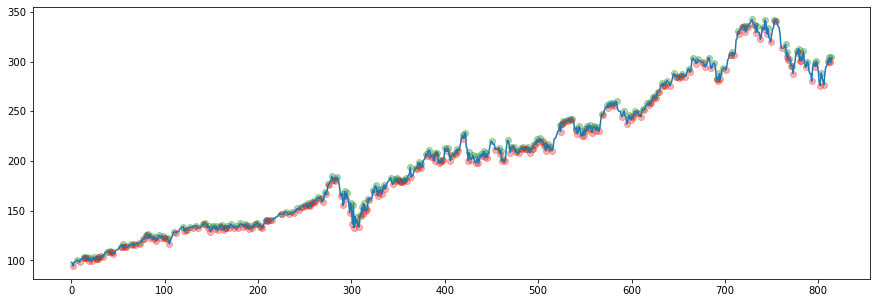

In [7]:
plt.figure(figsize=(15,5))
plt.plot(subset.index, subset.Close)
plt.scatter(x = peaks, y = subset.Close.iloc[peaks], alpha = .3, color = 'g')
plt.scatter(x = bottoms, y = subset.Close.iloc[bottoms], alpha = .3, color = 'r')



In [8]:
peaks

array([  6,  13,  15,  17,  20,  24,  27,  29,  32,  38,  41,  44,  53,
        55,  58,  64,  67,  72,  77,  80,  82,  85,  90,  94,  98, 100,
       103, 110, 120, 123, 127, 133, 141, 143, 147, 152, 155, 159, 161,
       165, 167, 171, 176, 181, 186, 188, 192, 197, 199, 203, 208, 210,
       213, 224, 230, 236, 242, 246, 250, 253, 255, 258, 260, 264, 267,
       272, 275, 279, 281, 285, 290, 293, 295, 299, 302, 304, 306, 309,
       311, 313, 316, 318, 323, 326, 329, 331, 335, 342, 347, 349, 351,
       353, 355, 358, 363, 369, 372, 374, 380, 383, 386, 390, 392, 395,
       397, 400, 403, 407, 411, 413, 419, 422, 426, 430, 435, 439, 442,
       444, 450, 458, 460, 462, 468, 471, 474, 477, 482, 484, 487, 489,
       493, 496, 499, 502, 505, 507, 510, 513, 523, 525, 527, 531, 534,
       536, 541, 544, 548, 550, 552, 555, 560, 563, 568, 574, 577, 580,
       584, 592, 597, 601, 604, 607, 612, 617, 620, 623, 625, 628, 633,
       635, 638, 645, 649, 652, 654, 661, 666, 671, 677, 683, 68

In [9]:
peak_properties

{'plateau_sizes': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'left_edges': array([  6,  13,  15,  17,  20,  24,  27,  29,  32,  38,  41,  44,  53,
         55,  58,  64,  67,  72,  77,  80,  82,  85,  90,  94,  98, 100,
        103, 110, 120, 123, 127, 133, 141, 143, 147, 152, 155, 159, 161,
        165, 167, 171, 176, 1

In [10]:
bottom_properties


{'plateau_sizes': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'left_edges': array([  2,   9,  14,  16,  19,  22,  26,  28,  30,  34,  40,  43,  45,
         54,  56,  59,  65,  68,  73,  78,  81,  84,  89,  91,  96,  99,
        102, 105, 112, 121, 124, 130, 136, 142, 146, 149, 154, 157, 160,
        163, 166, 169, 174, 1

In [11]:
f = [*peaks, *bottoms]

In [12]:
f_price = subset.iloc[sorted(f)].Close
f_price

2       93.990868
6      100.620407
9       98.478111
13     103.940002
14     101.981049
          ...    
810    300.429993
811    299.160004
812    304.059998
813    299.489990
814    304.100006
Name: Close, Length: 426, dtype: float64

In [13]:
window_size = 5
db_count = 0
double_bottoms = []
for i in range(len(f_price) - window_size + 1):
    x = f_price[i:i+window_size]
    
    xl = x.to_list()
    
    if xl[0] > xl[1] and xl[1] < xl[2] and xl[2] > xl[3] and xl[1] < xl[3] and xl[3] < xl[4] and xl[2] < xl[4]:
        if xl[0] * .99 > xl[1]: # exclude minor movements
            if subset['Gradient'].iloc[x.index[1]:x.index[2]].is_monotonic and subset['Gradient'].iloc[x.index[2]:x.index[3]].is_monotonic:
                double_bottoms.append(x)
                db_count += 1
print(db_count)


KeyError: 'Gradient'

In [ ]:
x = f_price[1:6]
x

2    211.274414
4    218.610550
6    213.942093
7    215.345627
9    211.672577
Name: Close, dtype: float64

In [ ]:
x.index[0]

2

In [ ]:
mod_db = [ db*.97 for db in double_bottoms] 

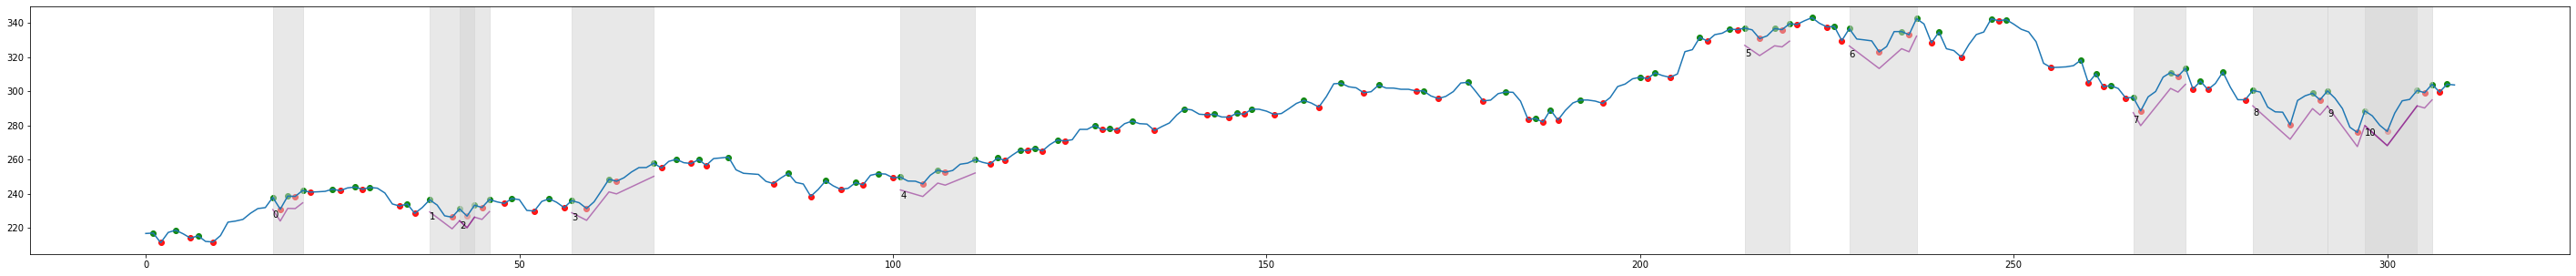

In [ ]:
plt.figure(figsize=(50,5))
plt.plot(subset.index, subset.Close)
plt.scatter(x = peaks, y = subset.Close.iloc[peaks], alpha = .9, color = 'g')
plt.scatter(x = bottoms, y = subset.Close.iloc[bottoms], alpha = .9, color = 'r')
i = 0
for db in mod_db:
    plt.plot(db.index, db.values, color = 'purple',linestyle = '-', alpha = .5)
    plt.axvspan(db.index[0], db.index[-1], color = 'lightgray', alpha = .5) 
    plt.text(x = db.index[0], y = db.values[0] * .98, s = str(i))
    i+=1

In [41]:
def find_w_pattern(subset, column_of_interest = "Close"):
    subset['Gradient'] = np.gradient(subset[column_of_interest].rolling(center=False,window=4).mean())
    subset.reset_index(inplace = True, drop= True)
    peaks, peak_properties = find_peaks(subset[column_of_interest], plateau_size = 1)
    bottoms, bottom_properties =  find_peaks(subset[column_of_interest] * - 1, plateau_size=1)
    local_extrema = [*peaks, *bottoms] # merging the two lists
    f_price = subset.iloc[sorted(local_extrema)][column_of_interest]

    window_size = 5
    db_count = 0
    double_bottoms = []
    for i in range(len(f_price) - window_size + 1):
        x = f_price[i:i+window_size]
        
        xl = x.to_list()
        
        if xl[0] > xl[1] and xl[1] < xl[2] and xl[2] > xl[3] and xl[1] < xl[3] and xl[3] < xl[4] and xl[2] < xl[4]:
            if xl[0] * .99 > xl[1]: # exclude minor movements
                if subset['Gradient'].iloc[x.index[1]:x.index[2]].is_monotonic and subset['Gradient'].iloc[x.index[2]:x.index[3]].is_monotonic:
                    double_bottoms.append(x)
                    db_count += 1
    
    mod_db = [ db*.97 for db in double_bottoms] 
    # plt.figure(figsize=(50,5))
    # plt.plot(subset.index, subset[column_of_interest])
    # plt.xticks(subset.Date)
    # plt.scatter(x = peaks, y = subset[column_of_interest].iloc[peaks], alpha = .9, color = 'g')
    # plt.scatter(x = bottoms, y = subset[column_of_interest].iloc[bottoms], alpha = .9, color = 'r')
    # i = 0
    # for db in mod_db:
    #     plt.plot(db.index, db.values, color = 'purple',linestyle = '-', alpha = .5)
    #     plt.axvspan(db.index[0], db.index[-1], color = 'lightgray', alpha = .5) 
    #     plt.text(x = db.index[0], y = db.values[0] * .98, s = str(i))
    #     i+=1
        
    p = figure(title = 'W patterns',
        x_axis_label = 'Date',
        y_axis_label = 'W%R',
        x_axis_type ='datetime',
        plot_width = 1200,
        plot_height = 200,
        tools = 'wheel_zoom, pan, reset')
    
    
    p.line(x = subset.Date, y = subset[column_of_interest], line_width = 1)
    p.circle(x = subset.Date.iloc[peaks], y = subset[column_of_interest].iloc[peaks], size = 5, color = 'green', alpha = .5)
    p.circle(x = subset.Date.iloc[bottoms], y = subset[column_of_interest].iloc[bottoms], size = 5, color = 'red', alpha = .5)
    for db in mod_db:
        p.line(x = subset.Date.iloc[db.index], y = db.values, color = 'purple' )
    show(p)

In [42]:
subset = data.loc[data.Symbol == 'MSFT']
find_w_pattern(subset) 

/tmp/ipykernel_9703/3458360580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Gradient'] = np.gradient(subset[column_of_interest].rolling(center=False,window=4).mean())


Opening in existing browser session.


In [16]:
subset.Date.iloc[[12, 34,35]]

12    2019-01-17
34    2019-02-20
35    2019-02-21
Name: Date, dtype: object